<a href="https://colab.research.google.com/github/Warpedro1/titanic/blob/main/Titanic_popg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import io
import seaborn as sns
from google.colab import files
from google.colab import drive
import seaborn as sns

import scipy
import scipy.stats
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Datasets/Titanic_db.csv')

Mounted at /content/gdrive


https://www.kaggle.com/c/titanic/data

#Preparação de dados I

## Primeira Impressão

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

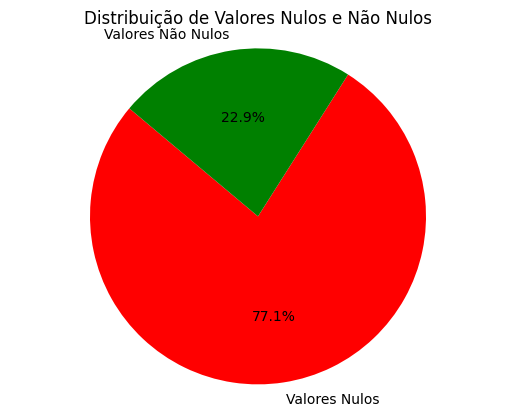

In [ ]:

num_nulos = df['Cabin'].isnull().sum()
num_nao_nulos = df['Cabin'].count()

labels = ['Valores Nulos', 'Valores Não Nulos']

sizes = [num_nulos, num_nao_nulos]

colors = ['red', 'green']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

plt.title('Distribuição de Valores Nulos e Não Nulos')

plt.axis('equal')
plt.show()


## Eliminando Colunas

In [ ]:
df.drop(['PassengerId','Ticket','Name', 'Cabin' ], axis=1, inplace=True)



Justificativa:


*   PassengerID: Era apenas um indexador, porém o dataset já possui um indexador natural que não irá alterar os testes ou as análises.
*   Ticket:  é único para cada pessoa não impactando nas análises e servindo apenas para identificar cada tripulante.
*   Name: é único para cada pessoa não impactando nas análises e servindo apenas para identificar cada tripulante.
*   Cabin: Tem uma grande porcetagem de valores nulos, sendo quase 80%








## Lidando Com Valores Nulos

In [ ]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
df.dropna(subset = ['Embarked'],inplace=True)

In [ ]:
print("Moda: ", df['Age'].mode())
print("\nMédia: ", df['Age'].mean())
print("\nMediana: ",df['Age'].median())

Moda:  0    24.0
Name: Age, dtype: float64

Média:  29.64209269662921

Mediana:  28.0


In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [ ]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Explorando Dados

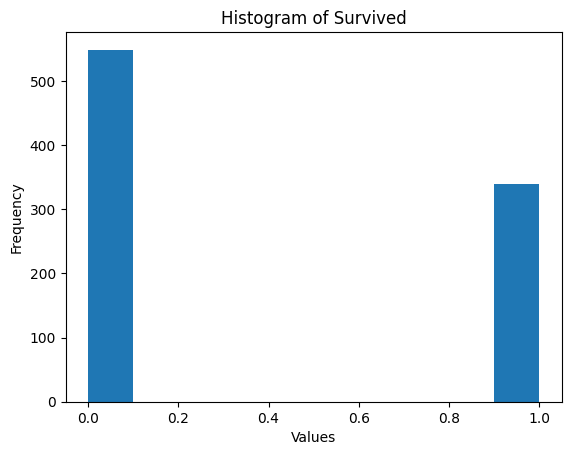

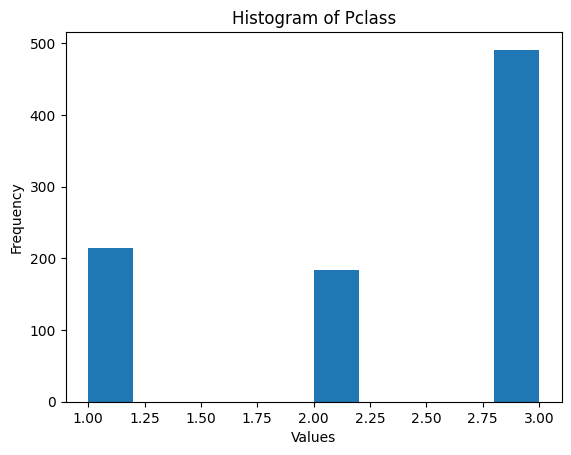

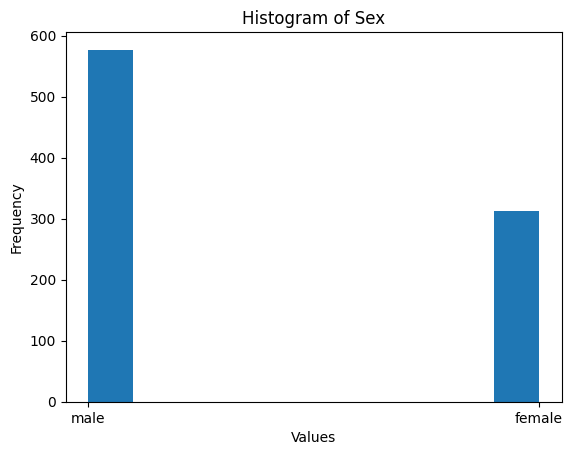

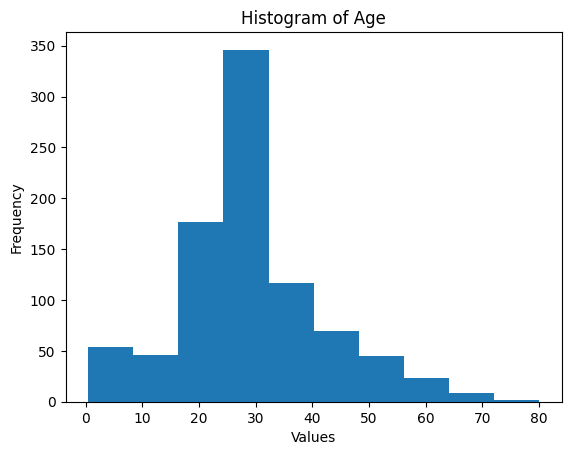

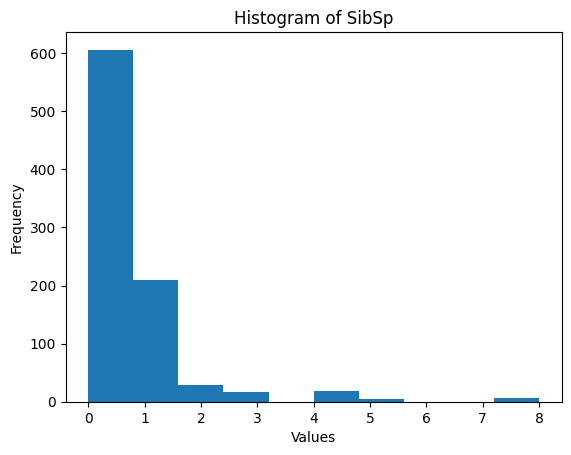

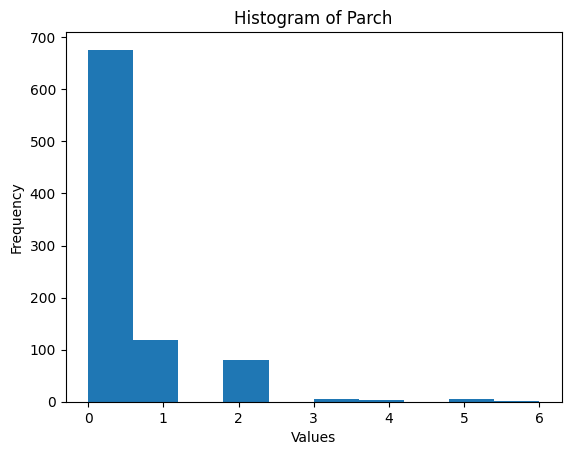

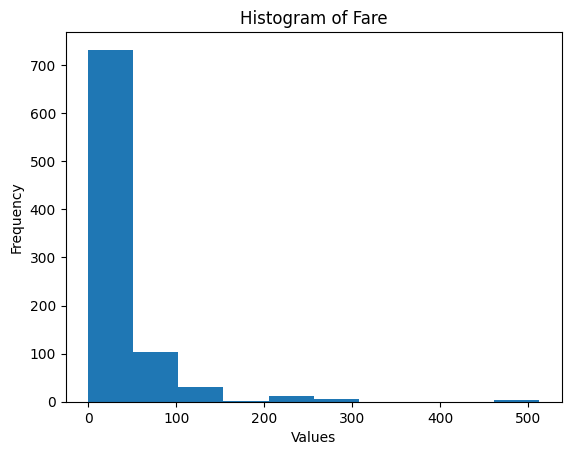

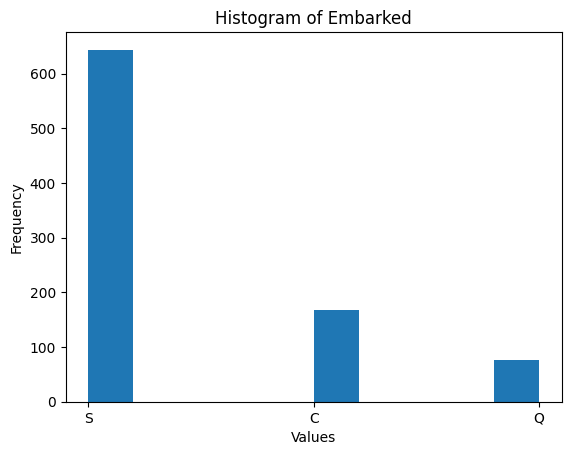

In [ ]:

for column in df.columns:
    plt.hist(df[column])
    plt.title(f'Histogram of {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

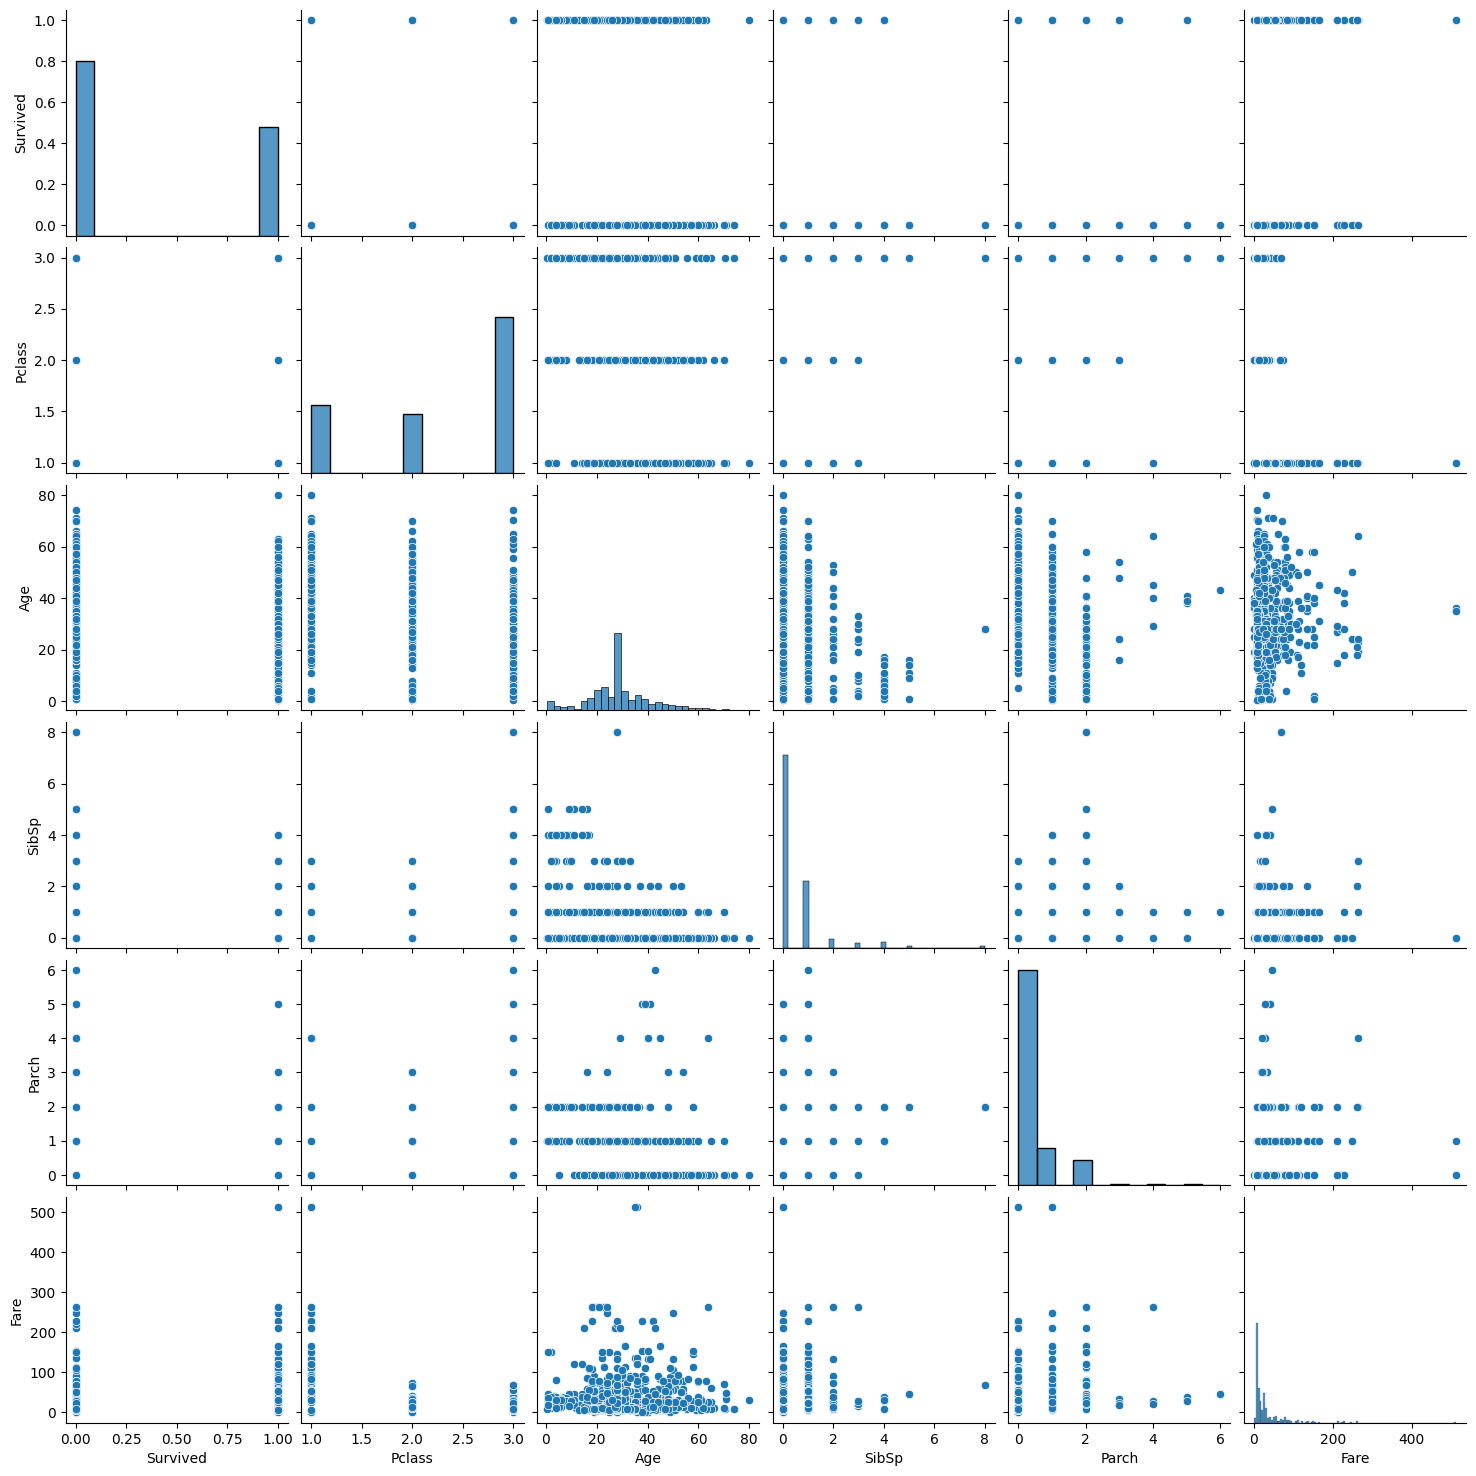

In [ ]:
import numpy as np

sns.pairplot(df.select_dtypes(include=[np.number]))
plt.show()

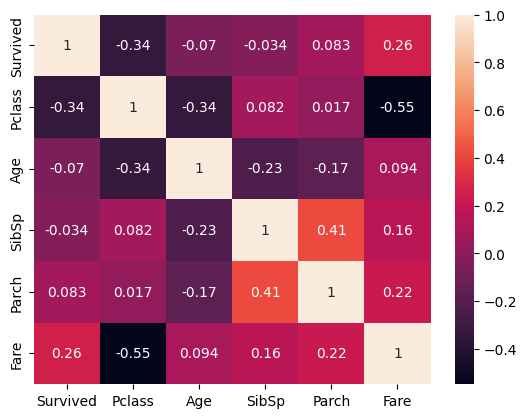

In [ ]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)
plt.show()

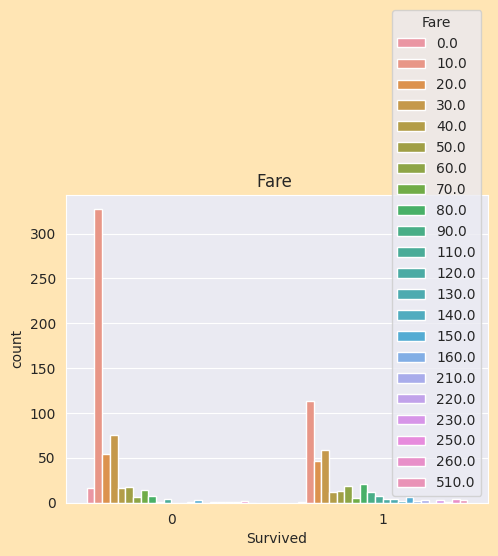

In [ ]:
fare =  df['Fare'].round(-1)

sns.set_style('darkgrid') #darkgrid, whitegrid, dark, white, ticks
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (5, 3)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

plt.figure(figsize=(12,4))
plt.subplot(121)
sns.countplot(x = "Survived", data=df, hue=fare)
plt.title('Fare ')


plt.show()

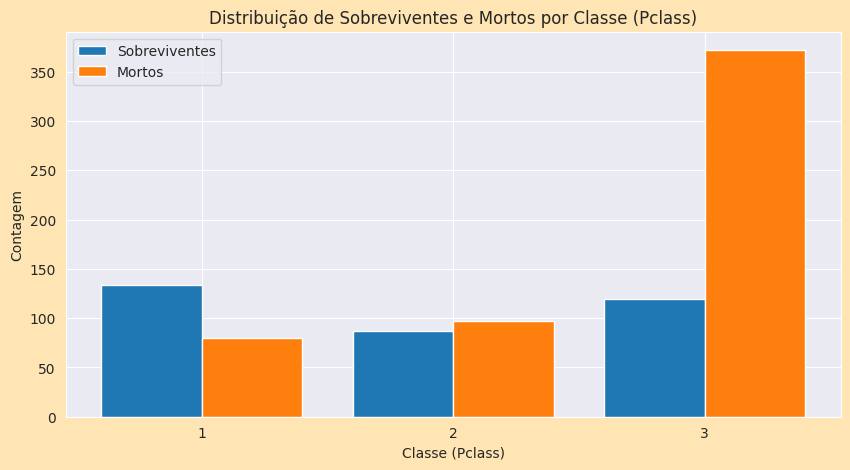

In [ ]:
sobreviventes = df[df['Survived'] == 1]
mortos = df[df['Survived'] == 0]

distribuicao_sobreviventes = sobreviventes['Pclass'].value_counts().sort_index()
distribuicao_mortos = mortos['Pclass'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(distribuicao_sobreviventes.index - 0.2, distribuicao_sobreviventes, width=0.4, label='Sobreviventes', align='center')
plt.bar(distribuicao_mortos.index + 0.2, distribuicao_mortos, width=0.4, label='Mortos', align='center')
plt.xlabel('Classe (Pclass)')
plt.ylabel('Contagem')
plt.title('Distribuição de Sobreviventes e Mortos por Classe (Pclass)')
plt.xticks(distribuicao_sobreviventes.index)
plt.legend()
plt.show()


In [ ]:
print(df['Pclass'].value_counts())

3    491
1    214
2    184
Name: Pclass, dtype: int64


Para ver se existia uma correlação entre ser homem e ter sobrevivido

#Preparação II

## Categóricos para Numéricos

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(df['Embarked'])
df['Embarked'] = label_encoder.transform(df['Embarked'])

label_encoder = LabelEncoder()
label_encoder.fit(df['Sex'])
df['Sex'] = label_encoder.transform(df['Sex'])

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [ ]:
df.rename(columns={'Sex': 'IsMale'}, inplace=True)


##Comparação de sobreviventes e não sobreviventes por Sexo


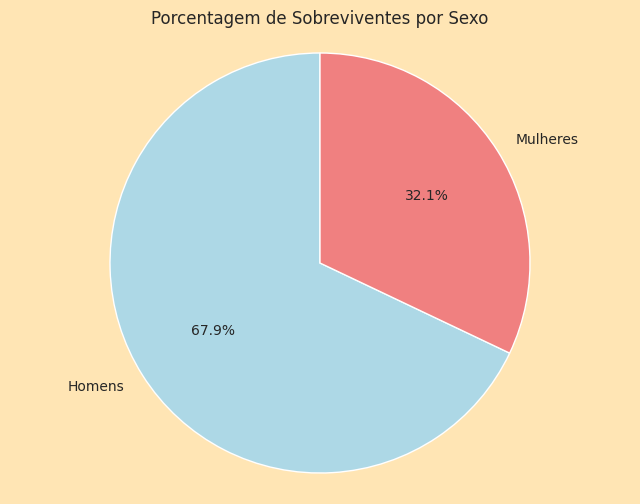

In [ ]:
sobreviventes = df[df['Survived'] == 1]
mortos = df[df['Survived'] == 0]

porcentagem_sobreviventes = sobreviventes['IsMale'].value_counts(normalize=True) * 100
porcentagem_mortos = mortos['IsMale'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
plt.pie(porcentagem_sobreviventes, labels=[ 'Homens', 'Mulheres'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Porcentagem de Sobreviventes por Sexo')
plt.axis('equal')
plt.show()


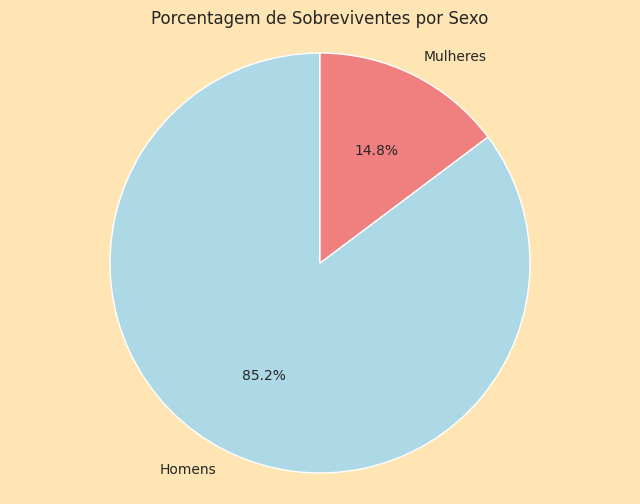

In [ ]:
sobreviventes = df[df['Survived'] == 0]
mortos = df[df['Survived'] == 0]

porcentagem_sobreviventes = sobreviventes['IsMale'].value_counts(normalize=True) * 100
porcentagem_mortos = mortos['IsMale'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
plt.pie(porcentagem_sobreviventes, labels=[ 'Homens', 'Mulheres'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Porcentagem de Sobreviventes por Sexo')
plt.axis('equal')
plt.show()

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

fig = px.histogram(df, x="IsMale", facet_col='Survived', color="IsMale",title="Sobreviventes e não sobreviventes por Sexo")
fig.update_layout(annotations=[
       go.layout.Annotation(
            showarrow=False,
            text='Mortos',
            xanchor='right',
            yanchor='top',
            y=1
        ), go.layout.Annotation(
            showarrow=False,
            text='Sobreviventes',
            xanchor='right',
            yanchor='top',
            y=1
        )])

fig.show()


##Dividindo a base de dados para ser testada e treinada

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##Normalizando os dataframes

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
df_normalized = pd.DataFrame(X_train_scaled, columns=X.columns)
df_normalized['Survived'] = y_train
df_normalized.head()

,Pclass,IsMale,Age,SibSp,Parch,Fare,Embarked,Survived
0,-2.0,-1.0,0.500000,1.0,0.0,3.318528,0.0,0.0
1,0.0,-1.0,-0.285714,0.0,0.0,-0.248340,0.0,1.0
2,0.0,0.0,-0.500000,0.0,0.0,-0.288998,0.0,NaN
3,-1.0,0.0,0.571429,1.0,2.0,0.582391,0.0,1.0
4,-1.0,0.0,0.071429,1.0,0.0,0.581107,-2.0,0.0


#kNN

In [ ]:
from sklearn.metrics import accuracy_score
from collections import Counter
import math

def distancia_euclidiana(p1, p2):
    return math.sqrt(sum((x - y) ** 2 for x, y in zip(p1, p2)))

def knn(train_data, test_point, k):
    distancias = [(exemplo[:-1], distancia_euclidiana(test_point, exemplo[:-1])) for exemplo in train_data]
    k_vizinhos = sorted(distancias, key=lambda x: x[1])[:k]
    classes = [vizinho[0][-1] for vizinho in k_vizinhos]
    classe_mais_comum = Counter(classes).most_common(1)[0][0]

    return classe_mais_comum


train_data, test_data = train_test_split(df.values, test_size=0.2, random_state=42)


for i in range(1, 11):
    previsoes = [knn(train_data, exemplo, i) for exemplo in test_data[:, :-1]]
    y_test = test_data[:, -1]
    acuracia = accuracy_score(y_test, previsoes)
    print(f'Acurácia do modelo k-NN personalizado com k={i}: {acuracia:.2f}')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



for i in range(1,11):

  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f'Acurácia do modelo k-NN com k={i}: {accuracy:.2f}')

Acurácia do modelo k-NN com k=1: 0.66
Acurácia do modelo k-NN com k=2: 0.71
Acurácia do modelo k-NN com k=3: 0.72
Acurácia do modelo k-NN com k=4: 0.69
Acurácia do modelo k-NN com k=5: 0.70
Acurácia do modelo k-NN com k=6: 0.69
Acurácia do modelo k-NN com k=7: 0.70
Acurácia do modelo k-NN com k=8: 0.73
Acurácia do modelo k-NN com k=9: 0.73
Acurácia do modelo k-NN com k=10: 0.74


#Avaliação de Classificadores

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(cm)

precision = precision_score(y_test, y_pred)
print(f"Precisão (Precision): {precision:.2f}")

recall = recall_score(y_test, y_pred)
print(f"Cobertura (Recall): {recall:.2f}")

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia (Accuracy): {accuracy:.2f}")

f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.2f}")


Matriz de Confusão:
[[96 13]
 [33 36]]
Precisão (Precision): 0.73
Cobertura (Recall): 0.52
Acurácia (Accuracy): 0.74
F1-Score: 0.61
